In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
df=pd.read_csv('telecom_churn.csv')

In [7]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [8]:
df.shape

(3333, 11)

In [9]:
df.isna().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [10]:
df.duplicated().sum()

0

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.corr()['Churn']

,Churn
Churn,1.000000
AccountWeeks,0.016541
ContractRenewal,-0.259852
DataPlan,-0.102148
DataUsage,-0.087195
CustServCalls,0.208750
DayMins,0.205151
DayCalls,0.018459
MonthlyCharge,0.072313
OverageFee,0.092812


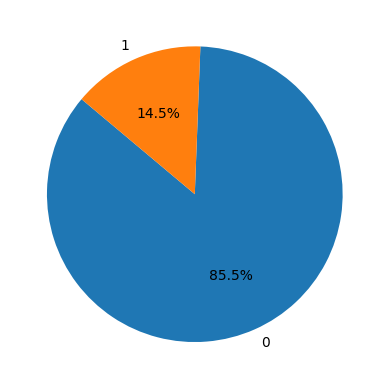

In [13]:
labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

<ipython-input-14-6577497ed8d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x = 'DataPlan',palette = 'Set2')


<Axes: xlabel='DataPlan', ylabel='count'>

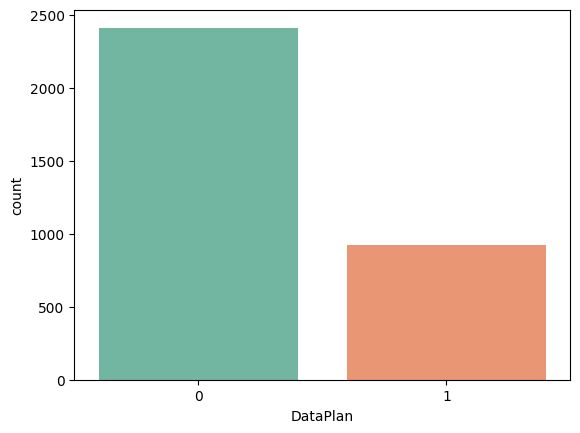

In [14]:
sns.countplot(df,x = 'DataPlan',palette = 'Set2')

<ipython-input-15-7adb1fae8ba1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x = 'CustServCalls',palette = 'Set1')


<Axes: xlabel='CustServCalls', ylabel='count'>

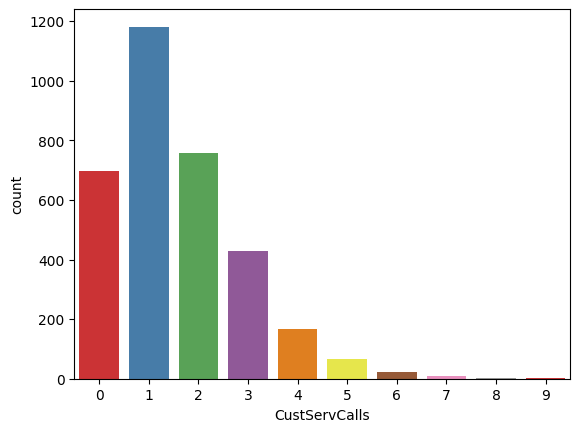

In [15]:
sns.countplot(df,x = 'CustServCalls',palette = 'Set1')

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn'],axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression()

In [21]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
prediction=lr.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,prediction)

0.8645454545454545